In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load the file input.txt
with open('input.txt', 'r') as file:
    input_data = file.read().strip()

# split the input data into lines
lines = input_data.split('\n')


In [3]:
def parse_line(line):
    # Split into position and velocity parts
    pos_part, vel_part = line.split(' v=')
    
    # Extract position coordinates
    pos_str = pos_part[2:]  # Remove 'p='
    pos_x, pos_y = map(int, pos_str.split(','))
    
    # Extract velocity coordinates 
    vel_x, vel_y = map(int, vel_part.split(','))
    
    return (pos_x, pos_y), (vel_x, vel_y)

robots = [parse_line(line) for line in lines]


In [4]:
num_steps = 100

x_max = 101
y_max = 103

In [5]:
def update_robot(robot, num_steps):

    (x, y), (vx, vy) = robot

    for i in range(num_steps):
        x += vx
        y += vy

        if x > x_max:
            x = x - x_max
        elif x < 0:
            x = x + x_max

        if y > y_max:
            y = y - y_max
        elif y < 0:
            y = y + y_max

    return (x, y), (vx, vy)

In [6]:
def count_robots4(robots):
    # Initialize counters for 4 regions (2x2 grid)
    top_left, top_right = 0, 0
    bot_left, bot_right = 0, 0

    # Define boundaries at 1/2 of max dimensions
    x_mid = x_max // 2
    y_mid = y_max // 2

    for (x, y), (vx, vy) in robots:
        # Top row
        if y > y_mid:
            if x < x_mid:
                top_left += 1
            elif x > x_mid:
                top_right += 1
        # Bottom row
        elif y < y_mid:
            if x < x_mid:
                bot_left += 1
            elif x > x_mid:
                bot_right += 1

    return np.array([top_left, top_right,
            bot_left, bot_right])



In [7]:
final_robots = [update_robot(robot, num_steps) for robot in robots]
counts = count_robots4(final_robots)
print(np.prod(counts))

229868730


# Part 2

In [8]:
def count_robots9(robots):
    # Initialize counters for 9 regions (3x3 grid)
    top_left, top_mid, top_right = 0, 0, 0
    mid_left, center, mid_right = 0, 0, 0  
    bot_left, bot_mid, bot_right = 0, 0, 0

    # Define boundaries at 1/3 and 2/3 of max dimensions
    x1, x2 = x_max // 3, (2 * x_max) // 3
    y1, y2 = y_max // 3, (2 * y_max) // 3

    for (x, y), (vx, vy) in robots:
        # Top row
        if y > y2:
            if x < x1:
                top_left += 1
            elif x < x2:
                top_mid += 1
            else:
                top_right += 1
        # Middle row
        elif y > y1:
            if x < x1:
                mid_left += 1
            elif x < x2:
                center += 1
            else:
                mid_right += 1
        # Bottom row
        else:
            if x < x1:
                bot_left += 1
            elif x < x2:
                bot_mid += 1
            else:
                bot_right += 1

    return np.array([top_left, top_mid, top_right,
            mid_left, center, mid_right,
            bot_left, bot_mid, bot_right])



In [9]:
def chi_squared(robots, num_steps):
    chi_squared_scores = []
    for _ in range(num_steps):
        q_counts = count_robots9(robots)

        q_mean = q_counts.mean()
        chi_squared_score = np.sum((q_counts - q_mean)**2)
        chi_squared_scores.append(chi_squared_score)
        robots = [update_robot(robot, 1) for robot in robots]

    return chi_squared_scores


7861


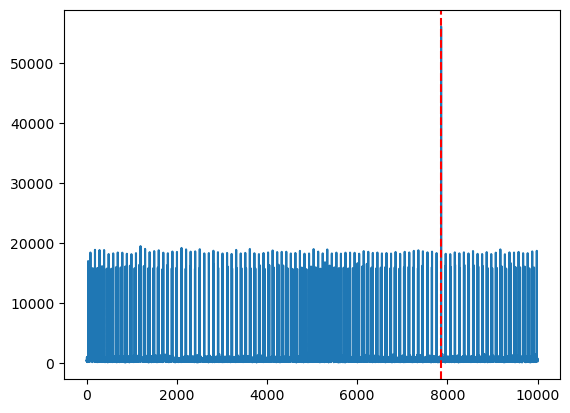

In [10]:
chi_scores = chi_squared(robots, 10000)

max_index = chi_scores.index(max(chi_scores))
print(max_index)

plt.plot(chi_scores)
plt.axvline(x=max_index, color='red', linestyle='--')
plt.show()

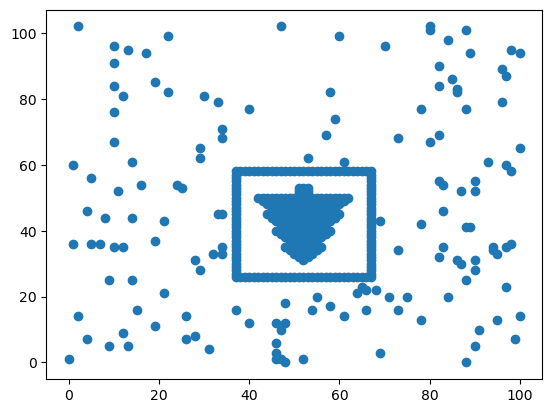

In [11]:
final_robots = [update_robot(robot, 7861) for robot in robots]
final_positions = [robot[0] for robot in final_robots]
plt.scatter([x[0] for x in final_positions], [x[1] for x in final_positions])
plt.show()
